# Heart Disease Analysis: Understanding Key Risk Indicators

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("heart_disease_uci.csv")

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

# Question 1 General Information
### How many rows and columns are in the dataset?

##### Answer: There are 920 rows and 16 columns

In [5]:
df.shape

(920, 16)

### Are there any missing values in the dataset?

##### Answer: There are many null values.

In [6]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
df = df.fillna(df.median())

C:\Users\HP\AppData\Local\Temp\ipykernel_7788\3493596106.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [8]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       2
thalch        0
exang         0
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

In [10]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

## Question 2. Target Variable Analysis
##### What is the distribution of the target variable (presence of heart disease: 0 or 1)?
##### Answer: The distribution is written below:
                0 = no heart disease = 411
                1 = mild heart disease = 265
                2 = moderate heart disease = 109 
                3 = severe heart disease = 107
                4 = critical heart disease = 28

In [11]:
distribution = df['num'].value_counts()
distribution_percentage = df['num'].value_counts(normalize=True) * 100

print(distribution)
print(distribution_percentage)

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: num, dtype: float64


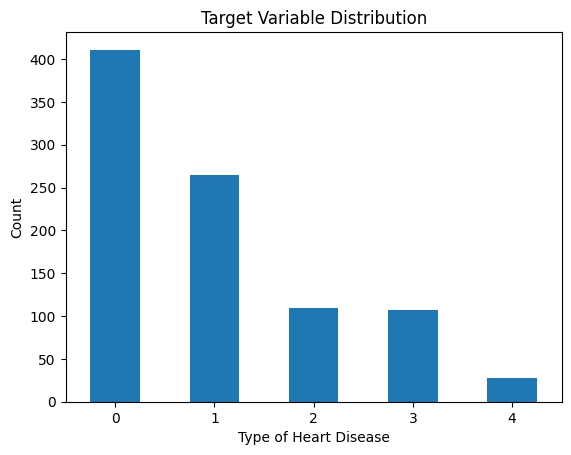

In [12]:
distribution.plot(kind='bar')
plt.title("Target Variable Distribution")
plt.xlabel("Type of Heart Disease")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

#### How many patients have heart disease, and how many don’t?
#### Answer: Persons who do not have heart disease are 411 and Persons who have heart disease either mild, moderate, severe or critical heart disease are 509. 

In [13]:
not_healthy = df[df['num'] != 0]
sum(not_healthy['num'].value_counts())

509

In [14]:
# healthy = sum(df['num'].value_counts()) - sum(not_healthy['num'].value_counts())
healthy = df[df['num'] == 0]
sum(healthy['num'].value_counts())

411

## Question 3. Demographic Insights
##### 1) What is the age range of patients in the dataset?
##### Answer: The age range of healthy people is 28 to 76. where as unhealthy people(patients having any kind of heart disease) age range is 31 to 77 which.

In [15]:
healthy.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.0
mean,355.257908,50.547445,129.917275,227.678832,148.372263,0.422384,0.111922,0.0
std,226.418610,9.433700,16.453274,74.061998,23.103587,0.697302,0.427276,0.0
min,1.000000,28.000000,80.000000,0.000000,69.000000,-1.100000,0.000000,0.0
25%,186.500000,43.000000,120.000000,201.000000,135.500000,0.000000,0.000000,0.0
50%,345.000000,51.000000,130.000000,225.000000,150.000000,0.000000,0.000000,0.0
75%,447.500000,57.000000,140.000000,266.000000,165.000000,0.600000,0.000000,0.0
max,919.000000,76.000000,190.000000,564.000000,202.000000,4.200000,3.000000,0.0


In [16]:
not_healthy.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,545.479371,55.903733,133.673870,177.485265,129.068762,1.201179,0.320236,1.799607
std,264.886869,8.718959,19.776003,126.311070,23.371722,1.166730,0.740825,0.955259
min,2.000000,31.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,1.000000
25%,286.000000,51.000000,120.000000,0.000000,113.000000,0.000000,0.000000,1.000000
50%,608.000000,57.000000,130.000000,219.000000,130.000000,1.000000,0.000000,1.000000
75%,751.000000,62.000000,145.000000,267.000000,144.000000,2.000000,0.000000,3.000000
max,920.000000,77.000000,200.000000,603.000000,195.000000,6.200000,3.000000,4.000000


##### 2) What is the gender distribution of the patients?
#### Answer: Gender Distribution for only patients: 
                Male = 459
                Female = 50


In [17]:
gender_dis = not_healthy['sex'].value_counts()
gender_dis_per = not_healthy['sex'].value_counts(normalize=True) * 100
print("Gender Distribution: ", gender_dis)
print("Gender Distribution percentage: ", gender_dis_per)

Gender Distribution:  Male      459
Female     50
Name: sex, dtype: int64
Gender Distribution percentage:  Male      90.176817
Female     9.823183
Name: sex, dtype: float64


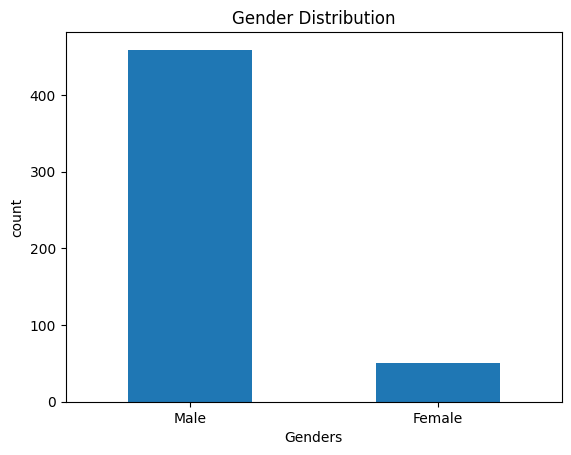

In [18]:
gender_dis.plot(kind = "bar")
plt.title("Gender Distribution")
plt.xlabel("Genders")
plt.ylabel("count")
plt.xticks(rotation = False)
plt.show()


## Question 4. Health Metrics
#### What are the average and median values of:

In [19]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.692391,0.853261,0.227174,0.995652
std,265.725422,9.424685,18.451300,109.040171,25.145235,1.058049,0.628936,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


##### 1) Resting blood pressure (trestbps)?
##### Answer: It is 130

##### 2) Serum cholesterol (chol)?
##### Answer: It is 223

##### 3) Maximum heart rate (thalach)?
##### Answer: It is 202

#

## Question 5. Categorical Features
##### 1) How many patients have exercise-induced angina (exang)?
##### Answer: 337 patients have induced exercise-induced angina and 583 patients have not induced any exercise-induced angina out of 920 patients total.

In [20]:
sum(df['exang'].value_counts())

920

In [21]:
sum(df['exang'] == True)

337

In [22]:
sum(df['exang']== False)

583

##### 2) What are the counts of different chest pain types (cp)?
##### Answer:   
                asymptomatic       496
                non-anginal        204
                atypical angina    174
                typical angina      46


In [23]:
cp_data = df['cp'].value_counts()
cp_data

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

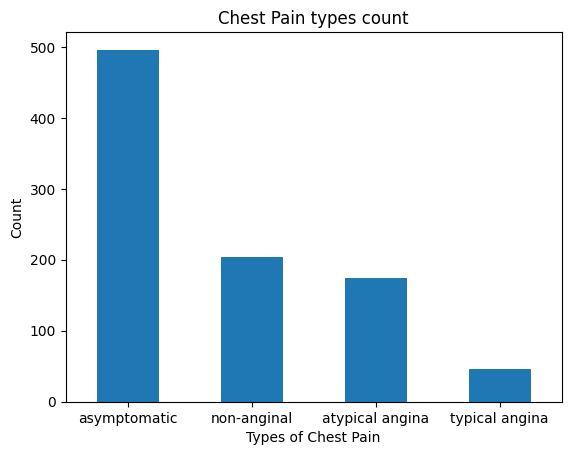

In [24]:
cp_data.plot(kind = "bar")
plt.title("Chest Pain types count")
plt.xlabel("Types of Chest Pain")
plt.ylabel("Count")
plt.xticks(rotation = False)
plt.show()

## Question 6. Visual Analysis
##### 1) Plot the age distribution of the patients.


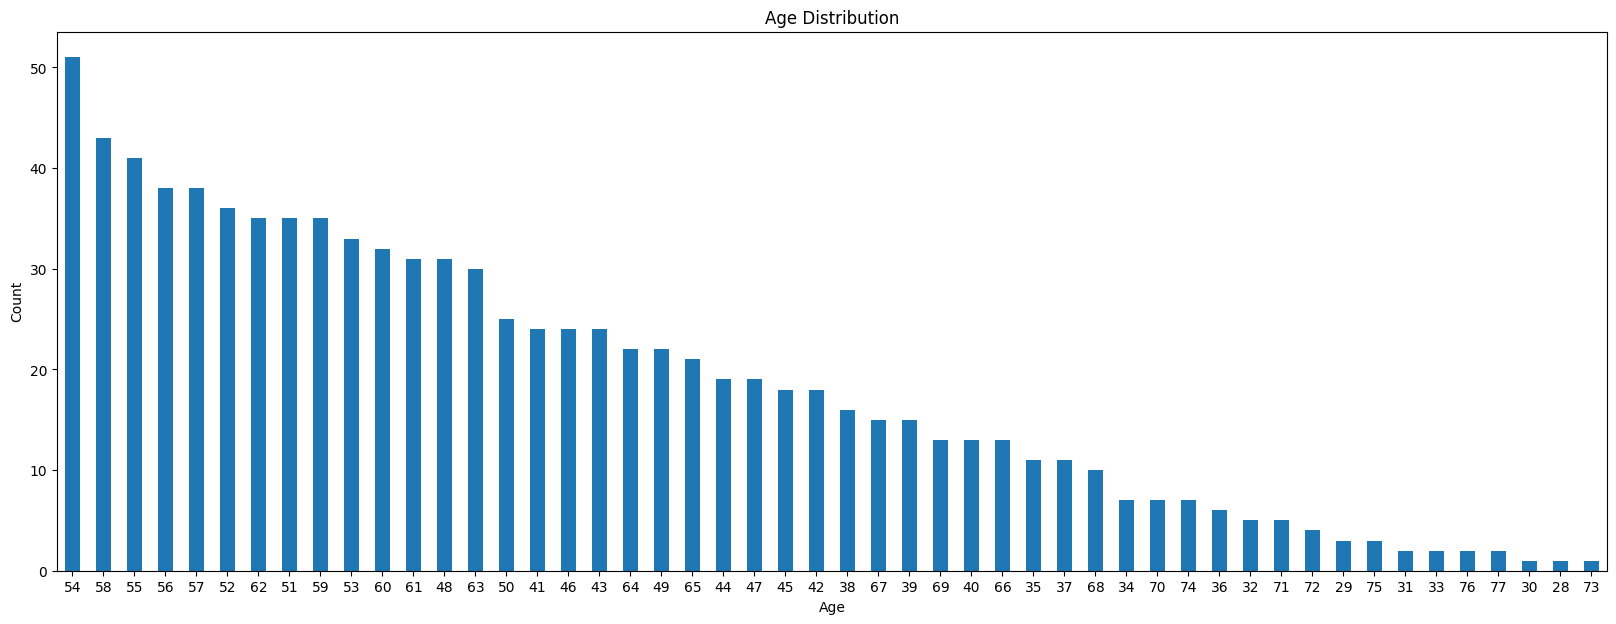

In [25]:
Age_Distribution = df['age'].value_counts()
plt.figure(figsize= (20,7))
Age_Distribution.plot(kind= 'bar')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation = False)
plt.show()

##### 2) Compare the average cholesterol levels between patients with and without heart disease.

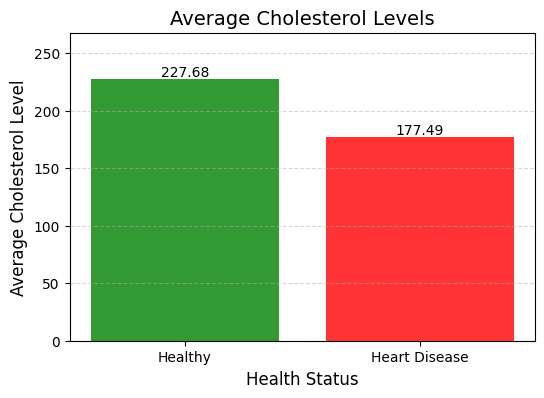

In [26]:
healthy_avg = healthy['chol'].mean()
not_healthy_avg = not_healthy['chol'].mean()

groups = ['Healthy', 'Heart Disease']
averages = [healthy_avg, not_healthy_avg]
plt.figure(figsize=(6, 4))
plt.bar(groups, averages, color=['green', 'red'], alpha=0.8)
for i, avg in enumerate(averages):
    plt.text(i, avg + 2, f'{avg:.2f}', ha='center', fontsize=10)

plt.title('Average Cholesterol Levels', fontsize=14)
plt.xlabel('Health Status', fontsize=12)
plt.ylabel('Average Cholesterol Level', fontsize=12)
plt.ylim(0, max(averages) + 40)  # Adjust y-axis for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## Question 7. Outliers
##### Are there any outliers in cholesterol (chol) or resting blood pressure (trestbps)?

Yes There are many outliers in the Chol and trestbps

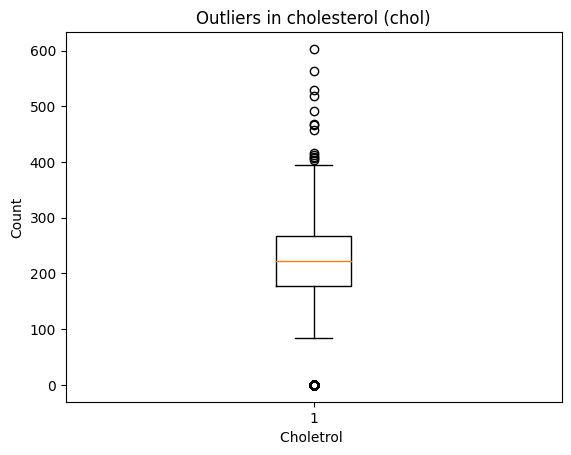

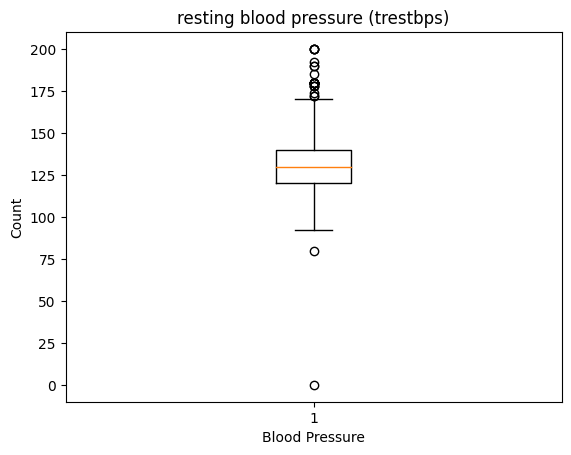

In [50]:
plt.boxplot(df["chol"])
plt.title("Outliers in cholesterol (chol)")
plt.xlabel("Choletrol ") 
plt.ylabel("Count")
plt.show() 

plt.boxplot(df["trestbps"])
plt.title("resting blood pressure (trestbps)")
plt.xlabel("Blood Pressure") 
plt.ylabel("Count")
plt.show()